In [112]:
import numpy as np
import pandas as pd
from pandas import read_csv

df = read_csv("./database/combined_d5_d7.csv", delim_whitespace=False, header=None)

df = df.iloc[1:]

feature_names = ['fl','fw','mt','pl','pw','sh','sl','sw','freq','s11','gain']

df.columns = feature_names

df = df.apply(pd.to_numeric)

df = df.drop(df[df.freq == 1].index)

x = df[['pl', 'pw', 'sh']]
y = df[['freq', 's11', 'gain']]

print(df.info())

print(x.head())
print(y.head())

<class 'pandas.core.frame.DataFrame'>
Index: 4118 entries, 3 to 4306
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fl      4118 non-null   float64
 1   fw      4118 non-null   float64
 2   mt      4118 non-null   float64
 3   pl      4118 non-null   float64
 4   pw      4118 non-null   float64
 5   sh      4118 non-null   float64
 6   sl      4118 non-null   float64
 7   sw      4118 non-null   float64
 8   freq    4118 non-null   float64
 9   s11     4118 non-null   float64
 10  gain    4118 non-null   float64
dtypes: float64(11)
memory usage: 386.1 KB
None
      pl     pw    sh
3  108.4  140.0  50.0
4  115.6  140.0  50.0
5  122.8  140.0  50.0
6  130.0  140.0  50.0
7  137.2  140.0  50.0
     freq        s11      gain
3  0.9595 -12.986922  9.013786
4  0.9505 -15.747823  9.050628
5  0.9397 -20.877129  8.969764
6  0.9298 -48.017489  9.256196
7  0.9190 -20.818344  9.506333


In [113]:
import random

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = random.randint(99, 9999))

scaler=StandardScaler()
scaler.fit(x_train)

X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)


In [116]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred = lr_model.predict(X_test_scaled)

mse_lr = mean_squared_error(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)

print('MSE-LR: ', mse_lr)
print('MAE-LR: ', mae_lr)

MSE-LR:  20.21787416281631
MAE-LR:  2.1283787968288865


In [119]:
rf_model = RandomForestRegressor(n_estimators = 200, random_state=20)
rf_model.fit(X_train_scaled, y_train)

y_pred_RF = rf_model.predict(X_test_scaled)

mse_RF = mean_squared_error(y_test, y_pred_RF)
mae_RF = mean_absolute_error(y_test, y_pred_RF)

print('MSE-Random Forest: ', mse_RF)
print('MAE-Random Forest: ', mae_RF)

MSE-Random Forest:  5.670056774021137
MAE-Random Forest:  0.7832606410909534


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 3)                 195       
                                                                 
Total params: 12,931
Trainable params: 12,931
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
65/65 [==============================] 

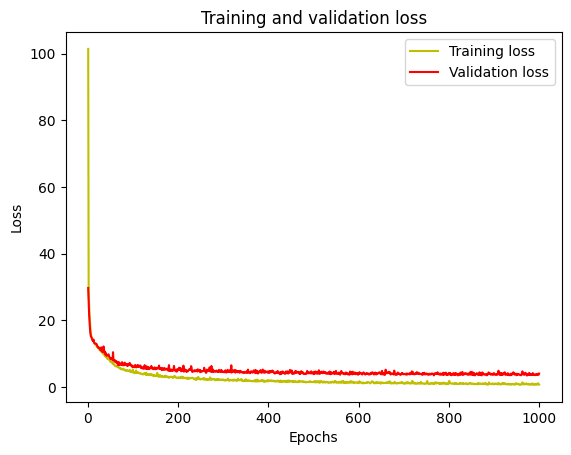

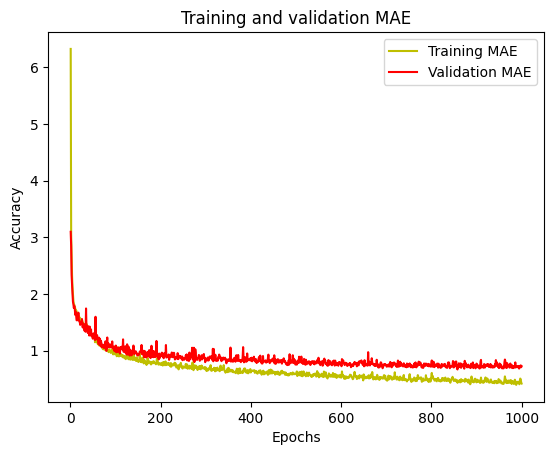

33/33 [==============================] - 0s 1ms/step - loss: 4.9113 - mae: 0.7560
MSE-NN:  4.911302089691162
MAE-NN:  0.7560498118400574


In [123]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(64, input_dim=3, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

history = model.fit(X_train_scaled, y_train, validation_split=0.33, epochs = 1000)

from matplotlib import pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('MSE-NN: ', mse_neural)
print('MAE-NN: ', mae_neural)

In [125]:
def predict(pl, pw, sh):

    check_df = pd.DataFrame(data=np.array([[pl, pw, sh]]))

    check_df.columns = ['pl', 'pw', 'sh']

    print(check_df.head())

    p_lr = lr_model.predict(scaler.transform(check_df))
    p_rf = rf_model.predict(scaler.transform(check_df))
    p_nn = model.predict(scaler.transform(check_df))

    return p_lr, p_rf, p_nn

p_lr, p_rf, p_nn = predict(140, 150, 80)

print(f"Linear Regression Prediction: \t\t {p_lr}")
print(f"Random Forest Prediction: \t\t {p_rf}")
print(f"Neural Network Prediction: \t\t {p_nn}")

    pl   pw  sh
0  140  150  80
1/1 [==============================] - 0s 85ms/step
Linear Regression Prediction: 		 [[  0.77517334 -18.47719874   8.96965543]]
Random Forest Prediction: 		 [[  0.854056   -20.74149052   9.50742488]]
Neural Network Prediction: 		 [[  0.90021646 -24.843395     9.381403  ]]
